In [270]:
import pandas as pd
import numpy as np
import itertools, matplotlib

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from clustering_functions import wcss_and_silhouette, silhouette_graph, run_TMCQ_graph

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
tmcq = ['Y1_P_TMCQ_ACTIVITY', 
            'Y1_P_TMCQ_AFFIL',  
            'Y1_P_TMCQ_ANGER',  
            'Y1_P_TMCQ_FEAR',  
            'Y1_P_TMCQ_HIP',  
            'Y1_P_TMCQ_IMPULS',  
            'Y1_P_TMCQ_INHIBIT',  
            'Y1_P_TMCQ_SAD', 
            'Y1_P_TMCQ_SHY', 
            'Y1_P_TMCQ_SOOTHE',  
            'Y1_P_TMCQ_ASSERT', 
            'Y1_P_TMCQ_ATTFOCUS',  
            'Y1_P_TMCQ_LIP', 
            'Y1_P_TMCQ_PERCEPT', 
            'Y1_P_TMCQ_DISCOMF', 
            'Y1_P_TMCQ_OPENNESS']

In [4]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
#data_small = data.sample(n=200)
X_TMCQ = data[['Y1_P_TMCQ_ACTIVITY', 
            'Y1_P_TMCQ_AFFIL',  
            'Y1_P_TMCQ_ANGER',  
            'Y1_P_TMCQ_FEAR',  
            'Y1_P_TMCQ_HIP',  
            'Y1_P_TMCQ_IMPULS',  
            'Y1_P_TMCQ_INHIBIT',  
            'Y1_P_TMCQ_SAD', 
            'Y1_P_TMCQ_SHY', 
            'Y1_P_TMCQ_SOOTHE',  
            'Y1_P_TMCQ_ASSERT', 
            'Y1_P_TMCQ_ATTFOCUS',  
            'Y1_P_TMCQ_LIP', 
            'Y1_P_TMCQ_PERCEPT', 
            'Y1_P_TMCQ_DISCOMF', 
            'Y1_P_TMCQ_OPENNESS']]

X_TMCQ_nonull = X_TMCQ[X_TMCQ.isnull().sum(axis=1) == 0]

In [133]:
data['DX'].value_counts()

3.0    574
1.0    327
Name: DX, dtype: int64

The JAMA paper used these 16 scales:
```
'Y1_P_TMCQ_ACTIVITY', 
'Y1_P_TMCQ_AFFIL',  
'Y1_P_TMCQ_ANGER',  
'Y1_P_TMCQ_FEAR',  
'Y1_P_TMCQ_HIP',  
'Y1_P_TMCQ_IMPULS',  
'Y1_P_TMCQ_INHIBIT',  
'Y1_P_TMCQ_SAD', 
'Y1_P_TMCQ_SHY', 
'Y1_P_TMCQ_SOOTHE',  
'Y1_P_TMCQ_ASSERT', 
'Y1_P_TMCQ_ATTFOCUS',  
'Y1_P_TMCQ_LIP', 
'Y1_P_TMCQ_PERCEPT', 
'Y1_P_TMCQ_DISCOMF', 
'Y1_P_TMCQ_OPENNESS',
```
The following were omitted:
```
'Y1_P_TMCQ_ACTIVCONT',
'Y1_P_TMCQ_SURGENCY',
'Y1_P_TMCQ_EFFCONT', 
'Y1_P_TMCQ_NEGAFFECT'
```

In [5]:
effortful_control = ['Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_kINHIBIT', 'Y1_P_TMCQ_ATTFOCUS']
surgency = ['Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_HIP', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL', 'Y1_P_TMCQ_ASSERT']
negative_emotion = ['Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_SAD']
weak_differentiation = ['Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_PERCEPT', 'Y1_P_TMCQ_LIP']

# Unsupervised Learning

[Subtyping ADHD Using Tempermant Dimensions](https://jamanetwork.com/journals/jamapsychiatry/fullarticle/1885709)

The above is a paper written by Dr. Karalunas that utilized community detection analysis on the Temperment in Middle Childhood Questionnaire (TMCQ).
They had 437 children and used the TMCQ from year 1. 
They specifically used the [Fast Greedy algorithm](https://arxiv.org/abs/cond-mat/0408187) and found 3 profiles of children, which they labeled as "mild", "surgent", and "irritable".

I tried different clustering algorithms to see if the same profiles seem to exist.
I also attempted to replicate this analysis on the full 901 dataset using community detection. ([community detection in python](https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/)).

They used physiological and MRI data to externally validate these profiles, which I don't really have. But I might be able to glean something interesting from the neuropsych data? Maybe? IDK. Focus on "are the profiles there".

## KMeans Clustering

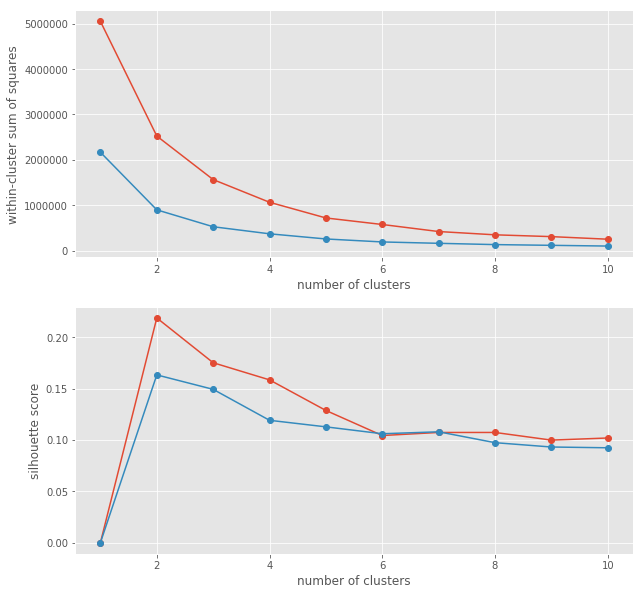

In [97]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
km = KMeans(n_jobs=-1)
wcss_and_silhouette(X_TMCQ_nonull, km, axs)
wcss_and_silhouette(X_TMCQ_nonull_ADHD, km, axs)

For n_clusters = 2 The average silhouette_score is : 0.21882625987
For n_clusters = 3 The average silhouette_score is : 0.173274654956
For n_clusters = 4 The average silhouette_score is : 0.158867445406
For n_clusters = 5 The average silhouette_score is : 0.127308810315


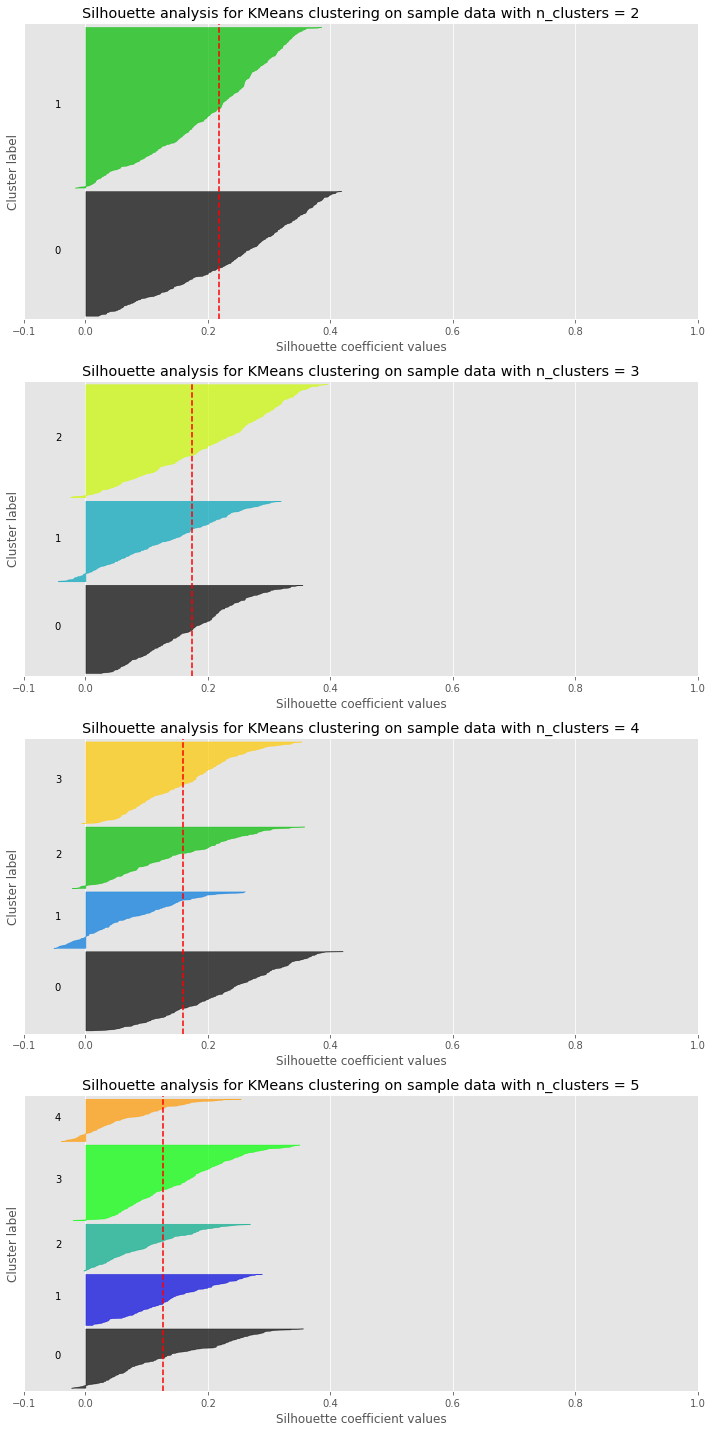

In [18]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull, axs)
plt.tight_layout()

## K = 2

It seems like K=2 is the best option for this data. I will thus explore the phenotypes of such.

In [216]:
km = KMeans(2)
y = km.fit_predict(X_TMCQ_nonull)

In [217]:
k2_df = X_TMCQ_nonull.copy()
k2_df['cluster'] = y

In [280]:
k2_df['DX'] = data.loc[X_TMCQ_nonull.index,'DX']
k2_df['DXSUB'] = data.loc[X_TMCQ_nonull.index,'DXSUB']

In [224]:
k2_df.head()

,Y1_P_TMCQ_ACTIVITY,Y1_P_TMCQ_AFFIL,Y1_P_TMCQ_ANGER,Y1_P_TMCQ_FEAR,Y1_P_TMCQ_HIP,Y1_P_TMCQ_IMPULS,Y1_P_TMCQ_INHIBIT,Y1_P_TMCQ_SAD,Y1_P_TMCQ_SHY,Y1_P_TMCQ_SOOTHE,Y1_P_TMCQ_ASSERT,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,cluster,DX,DXSUB
0,3.777778,4.600000,1.571429,2.222222,3.909091,2.000000,4.500000,1.7,1.8,4.375000,3.500000,4.625000,4.142857,2.777778,2.555556,4.222222,0,1.0,1.0
1,4.250000,4.666667,3.857143,3.333333,3.700000,4.083333,3.000000,3.1,2.2,2.428571,4.625000,1.000000,3.666667,4.800000,3.571429,4.600000,1,3.0,3.0
2,2.666667,4.700000,2.571429,2.555556,2.800000,2.615385,3.750000,2.7,2.4,4.125000,4.375000,4.000000,5.000000,3.800000,2.800000,4.777778,0,1.0,1.0
4,4.666667,4.600000,4.571429,4.333333,4.444444,4.500000,3.625000,4.3,3.4,1.875000,4.333333,1.500000,4.375000,4.000000,4.000000,4.857143,1,3.0,5.0
9,4.428571,4.666667,4.250000,4.142857,3.400000,3.923077,2.833333,5.0,3.6,1.375000,4.000000,2.428571,3.500000,3.714286,3.888889,4.250000,1,1.0,1.0


In [228]:
k2_df[k2_df['cluster']==0]

,Y1_P_TMCQ_ACTIVITY,Y1_P_TMCQ_AFFIL,Y1_P_TMCQ_ANGER,Y1_P_TMCQ_FEAR,Y1_P_TMCQ_HIP,Y1_P_TMCQ_IMPULS,Y1_P_TMCQ_INHIBIT,Y1_P_TMCQ_SAD,Y1_P_TMCQ_SHY,Y1_P_TMCQ_SOOTHE,Y1_P_TMCQ_ASSERT,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,cluster,DX,DXSUB
0,3.777778,4.600000,1.571429,2.222222,3.909091,2.000000,4.500000,1.700000,1.800000,4.375000,3.500000,4.625000,4.142857,2.777778,2.555556,4.222222,0,1.0,1.0
2,2.666667,4.700000,2.571429,2.555556,2.800000,2.615385,3.750000,2.700000,2.400000,4.125000,4.375000,4.000000,5.000000,3.800000,2.800000,4.777778,0,1.0,1.0
15,4.666667,4.200000,2.142857,2.222222,4.000000,2.923077,3.750000,2.100000,2.600000,3.875000,3.571429,3.875000,3.875000,3.400000,2.100000,4.111111,0,1.0,1.0
16,4.500000,4.625000,2.428571,2.333333,3.900000,2.769231,4.500000,2.800000,2.400000,2.000000,3.125000,3.500000,4.142857,4.000000,2.500000,4.500000,0,1.0,1.0
23,2.555556,4.900000,2.000000,1.444444,2.727273,1.615385,4.250000,1.900000,1.800000,4.750000,3.375000,4.625000,4.875000,3.700000,2.500000,4.111111,0,1.0,1.0
24,4.333333,4.400000,2.857143,1.888889,3.555556,2.615385,3.125000,1.900000,1.200000,4.125000,4.625000,4.625000,3.375000,3.000000,2.100000,3.777778,0,1.0,1.0
25,3.000000,3.700000,2.857143,2.333333,3.000000,2.615385,3.500000,1.900000,2.000000,3.375000,3.375000,3.875000,3.625000,2.500000,2.400000,3.666667,0,1.0,1.0
27,1.444444,2.100000,3.285714,3.000000,2.090909,1.076923,4.250000,2.700000,4.200000,3.875000,3.250000,1.750000,3.125000,2.555556,1.777778,4.111111,0,3.0,3.0
28,3.777778,4.800000,2.428571,1.222222,3.363636,2.461538,3.375000,1.500000,2.200000,4.500000,3.000000,4.125000,3.500000,1.900000,1.800000,3.888889,0,1.0,1.0
29,3.555556,4.900000,2.428571,1.777778,3.181818,1.923077,3.125000,1.500000,2.400000,4.125000,3.625000,4.750000,4.125000,2.500000,1.800000,4.000000,0,1.0,1.0


In [278]:
cluster0 = k2_df[k2_df['cluster']==0]
cluster1 = k2_df.loc[k2_df[k2_df['cluster']==1].index,:]

In [238]:
class_len_dict = dict(k2_df['DX'].value_counts())

In [284]:
sum(class_len_dict.values())

888

In [277]:
cluster_0_dict = dict(cluster0['DX'].value_counts())
cluster_1_dict = dict(cluster1['DX'].value_counts())

In [274]:
k2_df.loc[(k2_df['cluster']==0).index,'DX'].value_counts()

3.0    564
1.0    324
Name: DX, dtype: int64

In [255]:
frac_dict = defaultdict(dict)
for dx, n in class_len_dict.items():
    for cluster_dict, cluster in zip([cluster_0_dict, cluster_1_dict], ['cluster0', 'cluster1']):
        frac_dict[dx][cluster] = cluster_dict[dx]/class_len_dict[dx]
        print(cluster_dict)

{1.0: 291, 3.0: 97}
{3.0: 467, 1.0: 33}
{1.0: 291, 3.0: 97}
{3.0: 467, 1.0: 33}


In [256]:
frac_dict

defaultdict(dict,
            {1.0: {'cluster0': 0.89814814814814814,
              'cluster1': 0.10185185185185185},
             3.0: {'cluster0': 0.17198581560283688,
              'cluster1': 0.82801418439716312}})

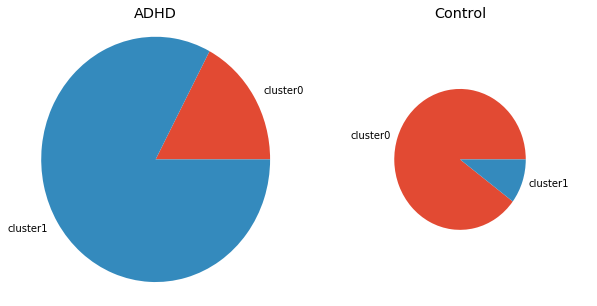

In [271]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
title_dict = {1.0: 'Control', 3.0: 'ADHD'}
for ax, (dx, cluster_dict) in zip(axs, frac_dict.items()):
    ax.pie(cluster_dict.values(), labels=cluster_dict.keys(), radius=class_len_dict[dx]/500)
    ax.set_title(title_dict[dx])

In [103]:
def make_jitter(data, jitter=0.3):
    return np.random.uniform(-jitter, jitter, size=data.shape)

In [141]:
k2_df['DX'].value_counts()

3.0    564
1.0    324
Name: DX, dtype: int64

In [145]:
cluster0['DX'].value_counts()

1.0    291
3.0     97
Name: DX, dtype: int64

In [146]:
cluster1['DX'].value_counts()

3.0    467
1.0     33
Name: DX, dtype: int64

In [148]:
cluster0_percent = [291/324, 97/564]
cluster1_percent = [33/324, 467/564]

In [125]:
ind = np.arange(1,3)
width = 0.5

Text(0.5,1,'Cluster proportions by DX Group')

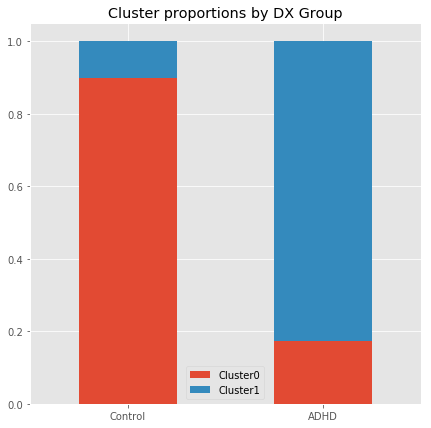

In [153]:
fig, ax = plt.subplots(figsize=(7,7))
ax.bar(ind, cluster0_percent, width, label='Cluster0')
ax.bar(ind, cluster1_percent, width,
       bottom=cluster0_percent, label='Cluster1')
ax.legend()
ax.set_xticks(ind)
ax.set_xticklabels(['Control', 'ADHD'])
ax.set_xlim(0.5, 2.5)
ax.set_title('Cluster proportions by DX Group')

In [114]:
cluster0['DX'].value_counts().values

array([291,  97])

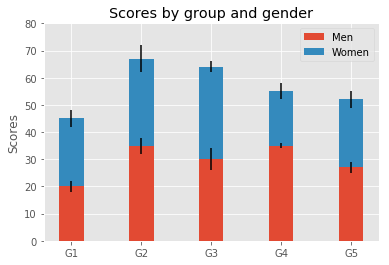

In [111]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

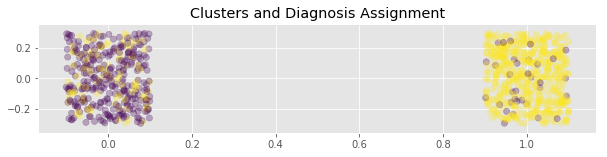

In [140]:
fig, ax = plt.subplots(figsize=(10,2))

_ = ax.scatter(k2_df.loc[:,'cluster']+make_jitter(k2_df.loc[:,'cluster'], 0.1), make_jitter(k2_df.loc[:,'DX']),
           c=k2_df.loc[:,'DX'],
           s=40, alpha=0.3)
#_ = ax.set_xlim(0,1)
_ = ax.set_title('Clusters and Diagnosis Assignment')

In [24]:
cluster0['DX'].value_counts()

3.0    467
1.0     33
Name: DX, dtype: int64

In [25]:
cluster1['DX'].value_counts()

1.0    291
3.0     97
Name: DX, dtype: int64

Here, it's easy to see that cluster 0 roughly corresponds to ADHD, cluster 1 corresponds to control.

DXSUB is still pretty well partitioned - Cluster 1 contains more ADHD subjects than cluster 0

In [132]:
from collections import defaultdict

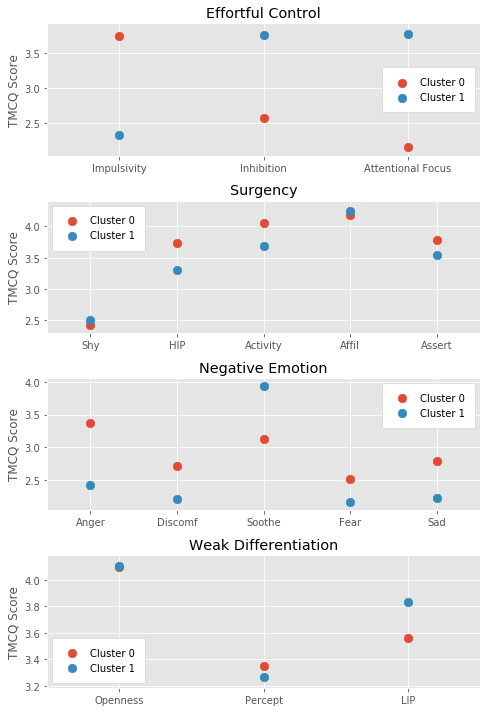

In [185]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1]
cluster_labels = ['Cluster 0', 'Cluster 1']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs)
plt.tight_layout()

## Conclusions

KMeans does not appear to be giving great clusters on control+adhd dataset. n=2 clusters appears to be the best.

# K-Means on ADHD

Following the JAMA paper, I will now examine the ADHD sample and control sample separately for clusters.

I will create z-scores for this sample, based on the control mean.

In [9]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_ADHD = data[data['DX'] == 3]
#data_small = data.sample(n=200)
X_TMCQ_ADHD = data_ADHD[tmcq]

X_TMCQ_nonull_ADHD = X_TMCQ_ADHD[X_TMCQ_ADHD.isnull().sum(axis=1) == 0]
X_TMCQ_ADHD_z_score = X_TMCQ_nonull_ADHD.copy()

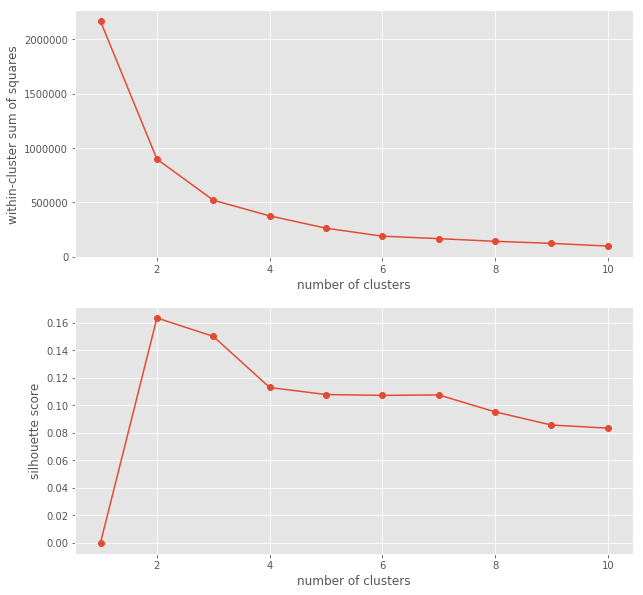

In [193]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull_ADHD, axs)

For n_clusters = 2 The average silhouette_score is : 0.16333709308
For n_clusters = 3 The average silhouette_score is : 0.150414053095
For n_clusters = 4 The average silhouette_score is : 0.118334397483
For n_clusters = 5 The average silhouette_score is : 0.104117363873


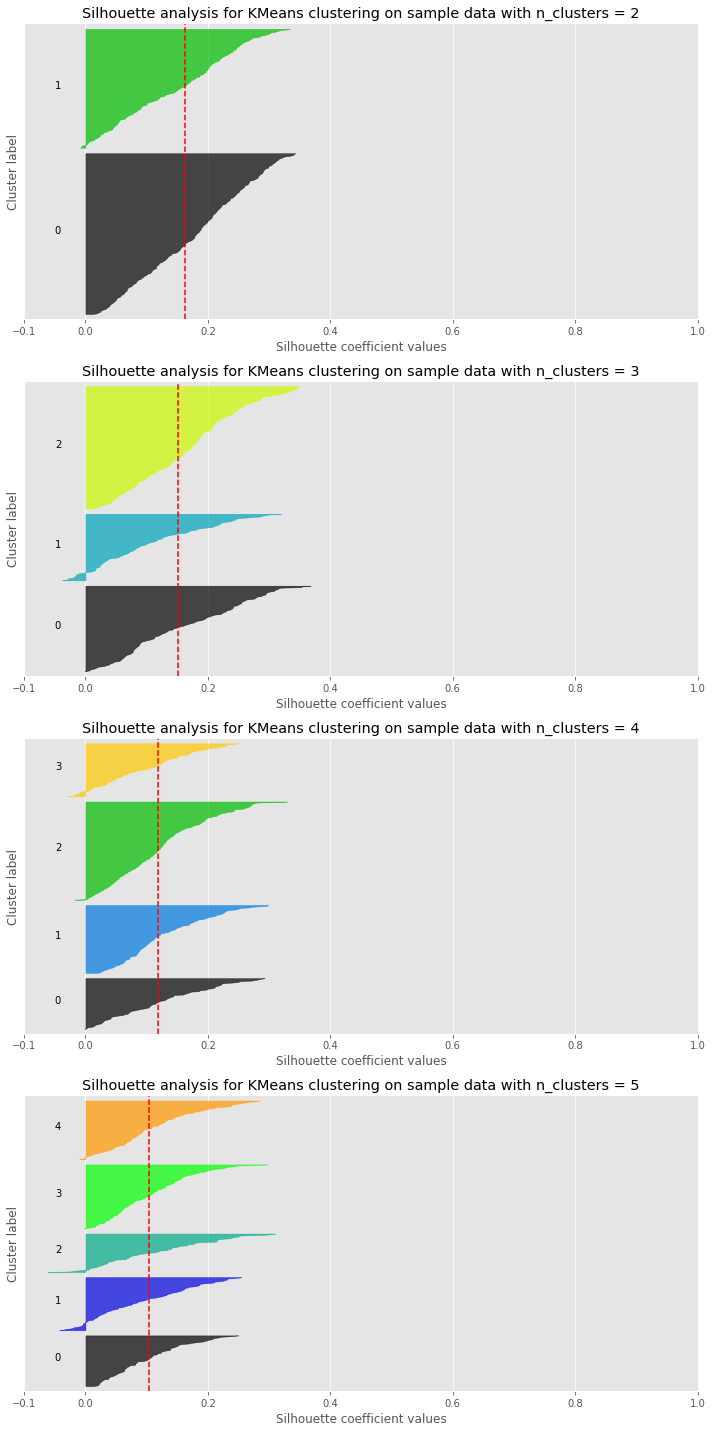

In [194]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull_ADHD, axs)
plt.tight_layout()

### K = 2

I will now investigate the TMCQ profiles using z-scores of the ADHD sample, following the procedure of the JAMA paper.

In [23]:
km_ADHD = KMeans(2)
y_ADHD = km_ADHD.fit_predict(X_TMCQ_nonull_ADHD)

In [24]:
k2_df_ADHD = X_TMCQ_nonull_ADHD.copy()
k2_df_ADHD['cluster'] = y_ADHD

In [25]:
k2_df_ADHD['DX'] = data.loc[X_TMCQ_nonull_ADHD.index,'DX']
k2_df_ADHD['DXSUB'] = data.loc[X_TMCQ_nonull_ADHD.index,'DXSUB']

In [13]:
cluster0 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==0].index,:]
cluster1 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==1].index,:]

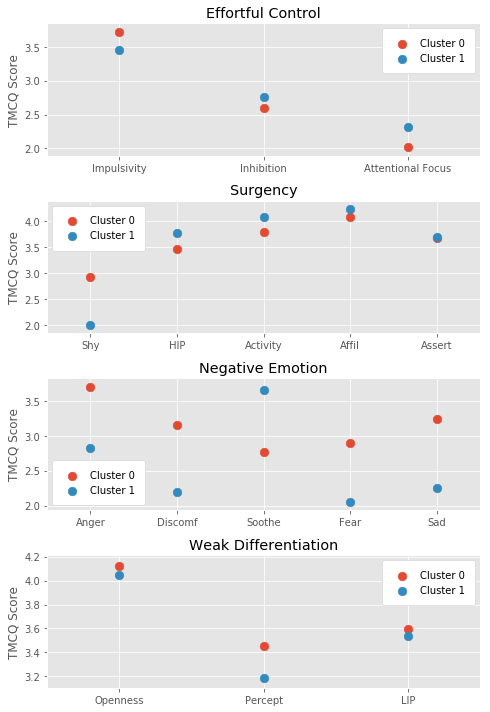

In [14]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1]
cluster_labels = ['Cluster 0', 'Cluster 1']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs)
plt.tight_layout()

# K-Means on Control

In [15]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_control = data[data['DX'] == 1]
X_TMCQ_control = data_control[tmcq]
X_TMCQ_nonull_control = X_TMCQ_control[X_TMCQ_control.isnull().sum(axis=1) == 0]
TMCQ_means_control = np.mean(X_TMCQ_nonull_control)

In [16]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_control = data[data['DX'] == 1]
#data_small = data.sample(n=200)
X_TMCQ_control = data_control[tmcq]

X_TMCQ_nonull_control = X_TMCQ_control[X_TMCQ_control.isnull().sum(axis=1) == 0]

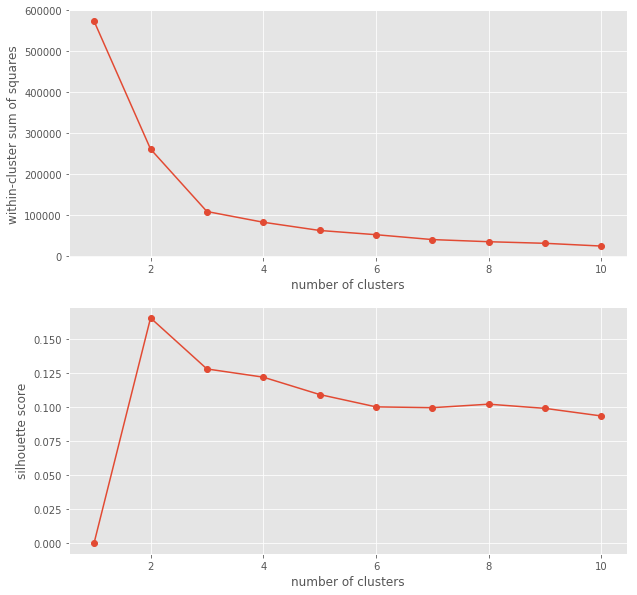

In [34]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_TMCQ_nonull_control, axs)

For n_clusters = 2 The average silhouette_score is : 0.166812070257
For n_clusters = 3 The average silhouette_score is : 0.127500950476
For n_clusters = 4 The average silhouette_score is : 0.120701638291
For n_clusters = 5 The average silhouette_score is : 0.108058620928


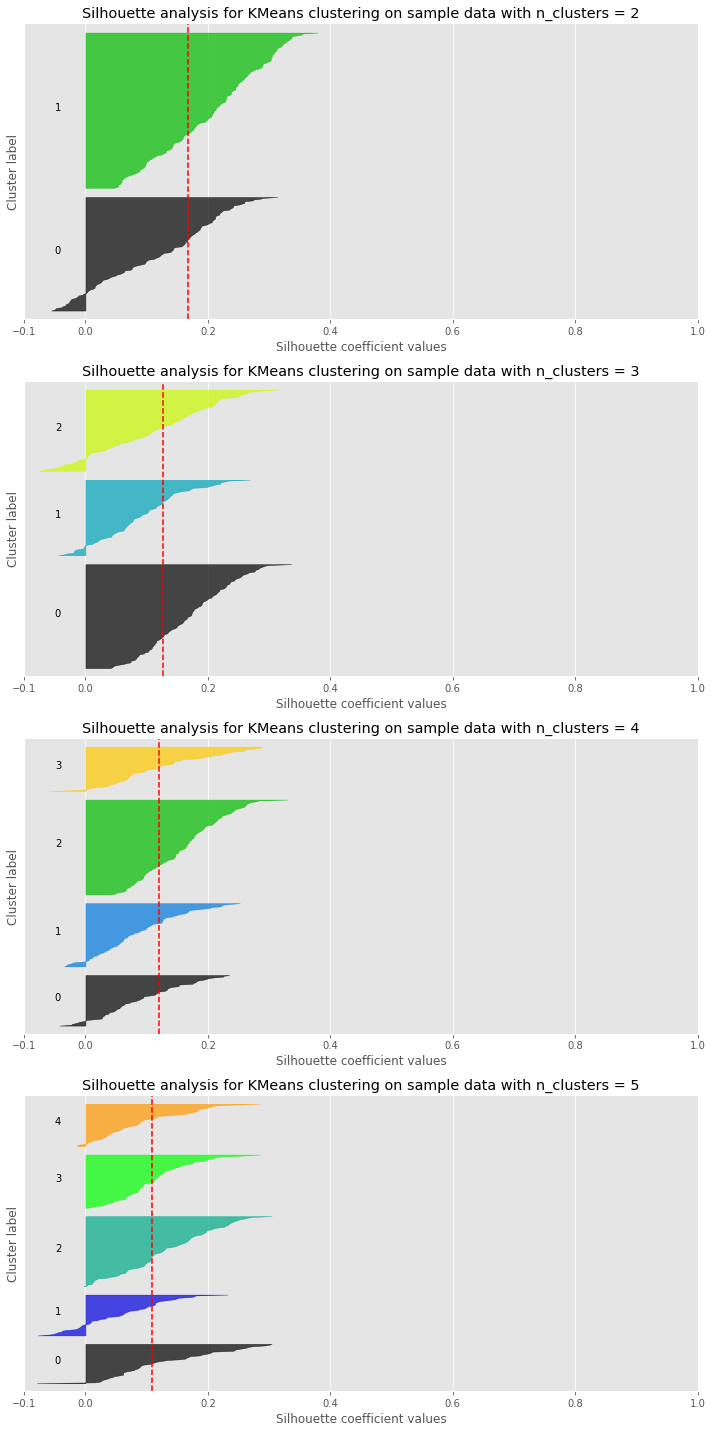

In [35]:
fig, axs = plt.subplots(4,1, figsize=(10,20))
silhouette_graph(X_TMCQ_nonull_control, axs)
plt.tight_layout()

### K = 2

I will now investigate the TMCQ profiles using z-scores of the ADHD sample, following the procedure of the JAMA paper.

In [26]:
km_control = KMeans(2)
y_control = km_control.fit_predict(X_TMCQ_nonull_control)

In [27]:
k2_df_control = X_TMCQ_nonull_control.copy()
k2_df_control['cluster'] = y_control

In [28]:
k2_df_control['DX'] = data.loc[X_TMCQ_nonull_control.index,'DX']
k2_df_control['DXSUB'] = data.loc[X_TMCQ_nonull_control.index,'DXSUB']

In [21]:
cluster0 = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==0].index,:]
cluster1 = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==1].index,:]

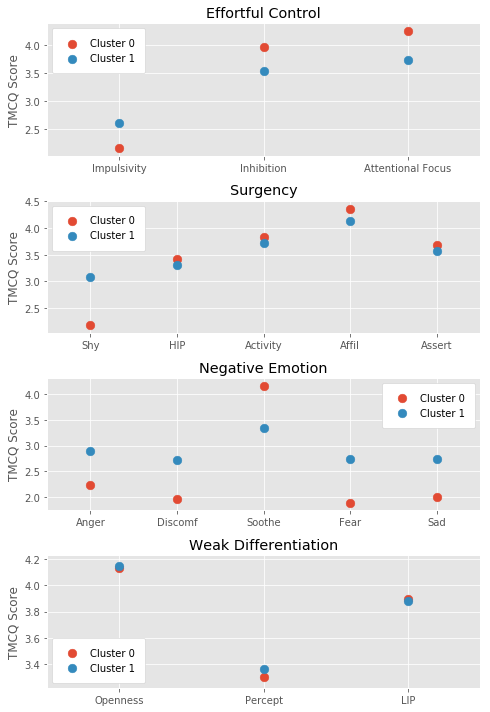

In [22]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1]
cluster_labels = ['Cluster 0', 'Cluster 1']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs)
plt.tight_layout()

## ADHD and Control Clusters together

In [30]:
cluster0A = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==0].index,:]
cluster1A = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==1].index,:]

In [31]:
cluster0C = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==0].index,:]
cluster1C = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==1].index,:]

(None,)

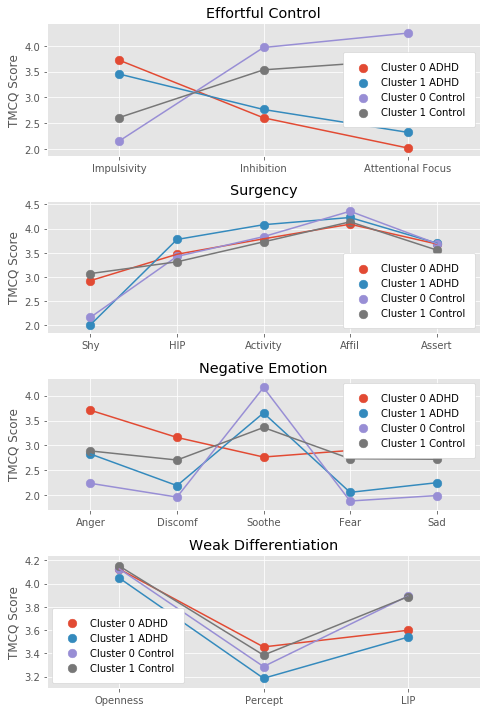

In [35]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0A, cluster1A, cluster0C, cluster1C]
cluster_labels = ['Cluster 0 ADHD', 'Cluster 1 ADHD', 'Cluster 0 Control', 'Cluster 1 Control']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs, cluster_labels=cluster_labels)
_ = plt.tight_layout()

## K=3, ADHD

I'm curious what will happen if I force 3 clusters, like in the paper. Will I see similar results?

In [41]:
km_ADHD = KMeans(3)
y_ADHD = km_ADHD.fit_predict(X_TMCQ_nonull_ADHD)

In [42]:
k2_df_ADHD = X_TMCQ_nonull_ADHD.copy()
k2_df_ADHD['cluster'] = y_ADHD

In [43]:
k2_df_ADHD['DX'] = data.loc[X_TMCQ_nonull_ADHD.index,'DX']
k2_df_ADHD['DXSUB'] = data.loc[X_TMCQ_nonull_ADHD.index,'DXSUB']

In [44]:
cluster0 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==0].index,:]
cluster1 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==1].index,:]
cluster2 = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==2].index,:]

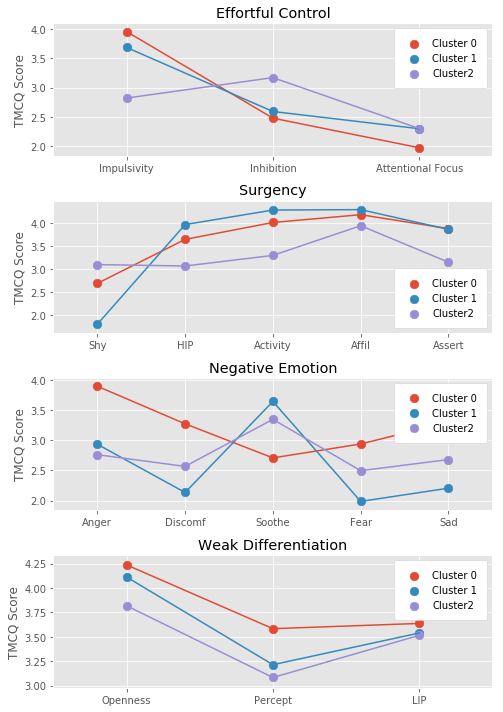

In [46]:
title_list = ['Effortful Control', 'Surgency', 'Negative Emotion', 'Weak Differentiation']
tmcq_cols = [effortful_control, surgency, negative_emotion, weak_differentiation]
tmcq_col_dict = {'Effortful Control': ['Impulsivity', 'Inhibition', 'Attentional Focus'],
                 'Surgency': ['Shy', 'HIP', 'Activity', 'Affil', 'Assert'],
                 'Negative Emotion': ['Anger', 'Discomf', 'Soothe', 'Fear', 'Sad'],
                 'Weak Differentiation': ['Openness', 'Percept', 'LIP']}
cluster_list = [cluster0, cluster1, cluster2]
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster2']

fig, axs = plt.subplots(4,1,figsize=(7,10))

run_TMCQ_graph(cluster_list, tmcq_cols, tmcq_col_dict, axs, cluster_labels=cluster_labels)
plt.tight_layout()

## Using Z-Scores for TMCQ

The JAMA paper: "Scores are shown as z scores relative to the control sample mean (0 on the y-axis is the mean of the typically developing sample). Limit lines indicate SEs. Scores were reversed for some scales as follows: for inhibition, high scores indicate less inhibitory control; for attentional focus, high scores mean poorer focus; for shyness, high scores mean less shy; for soothability, high scores indicate less soothability. "

# Unsupervised Learning for Neuropsych

Moving away from replication and towards exploration. I want to see if there are distinct clusters in the neuropsych data.

In [47]:
neuro = ['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
            'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
            'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
            'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']

In [61]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
#data_small = data.sample(n=200)
X_neuro = data[neuro]

X_neuro_nonull = X_neuro[X_neuro.isnull().sum(axis=1) == 0]

Data needs preprocessing and imputation for kmeans here, so I'll make a pipeline.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [63]:
scaler = StandardScaler()
kmeans = KMeans(n_jobs=-1)

steps = [('standard_scaler', scaler),
         ('kmeans', kmeans)]

pipeline = Pipeline(steps)

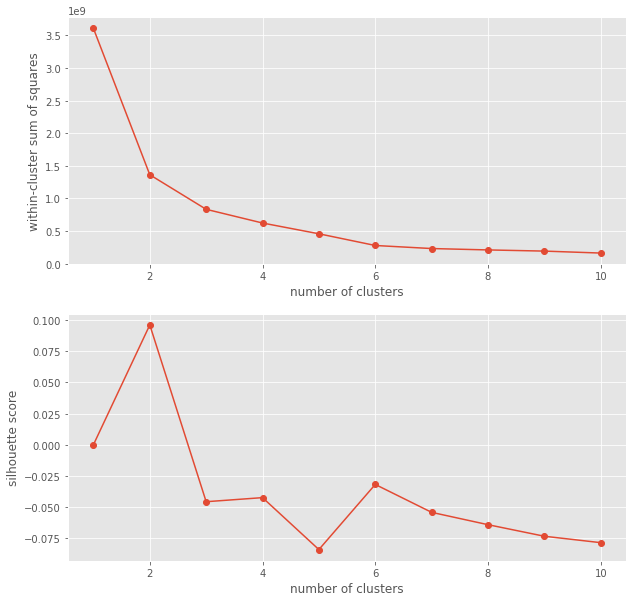

In [64]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_neuro_nonull, pipeline, axs)

## ADHD

In [65]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_ADHD = data[data['DX'] == 3]
X_neuro_ADHD = data_ADHD[neuro]

X_neuro_nonull_ADHD = X_neuro_ADHD[X_neuro_ADHD.isnull().sum(axis=1) == 0]

In [66]:
scaler = StandardScaler()
kmeans = KMeans(n_jobs=-1)

steps = [('standard_scaler', scaler),
         ('kmeans', kmeans)]

pipeline = Pipeline(steps)

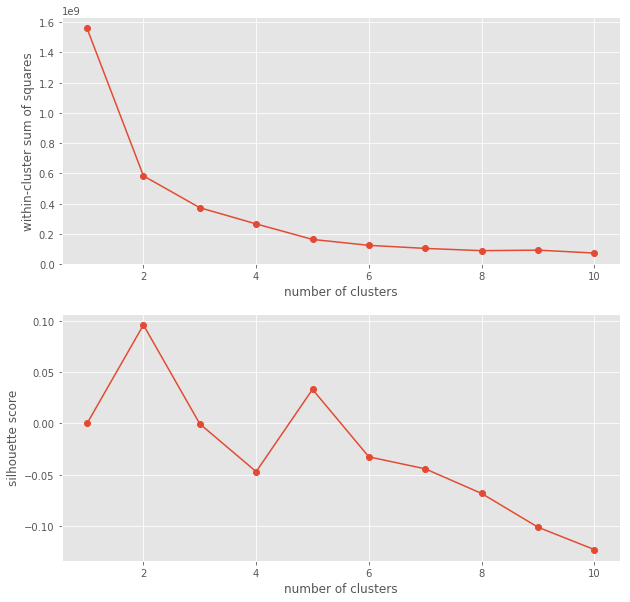

In [67]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_neuro_nonull_ADHD, pipeline, axs)

## Control

In [68]:
data = pd.read_csv('data/Christie_diagnosis_20180118.csv')
data_control = data[data['DX'] == 1]
X_neuro_control = data_control[neuro]

X_neuro_nonull_control = X_neuro_control[X_neuro_control.isnull().sum(axis=1) == 0]

In [69]:
scaler = StandardScaler()
kmeans = KMeans(n_jobs=-1)

steps = [('standard_scaler', scaler),
         ('kmeans', kmeans)]

pipeline = Pipeline(steps)

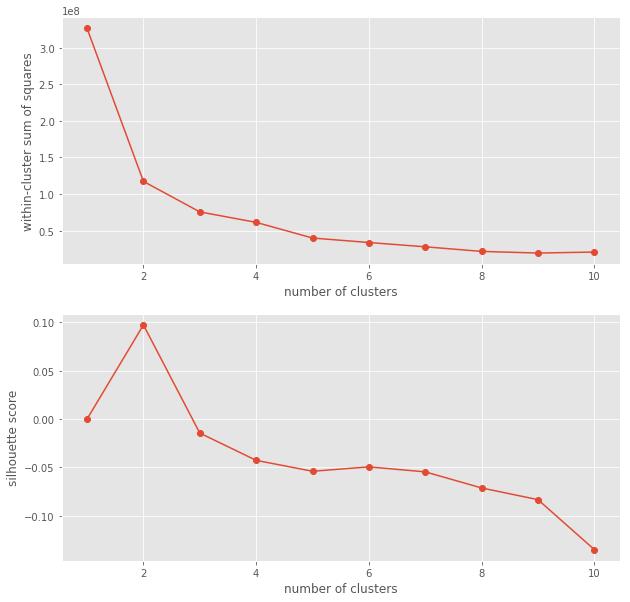

In [70]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
wcss_and_silhouette(X_neuro_nonull_control, pipeline, axs)

## Scores for both

In [154]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_jobs=-1)

steps = [('standard_scaler', scaler),
         ('kmeans', kmeans)]

pipeline_control = Pipeline(steps)
pipeline_ADHD = Pipeline(steps)

y_control = pipeline_control.fit_predict(X_neuro_nonull_control)
y_ADHD = pipeline_ADHD.fit_predict(X_neuro_nonull_ADHD)

In [155]:
k2_df_control = X_neuro_nonull_control.copy()
k2_df_control.loc[:,:] = scaler.fit_transform(X_neuro_nonull_control)
k2_df_control['cluster'] = y_control

k2_df_ADHD = X_neuro_nonull_ADHD.copy()
k2_df_ADHD.loc[:,:] = scaler.fit_transform(X_neuro_nonull_ADHD)
k2_df_ADHD['cluster'] = y_ADHD

In [156]:
k2_df_control['DX'] = data.loc[X_neuro_nonull_control.index,'DX']
k2_df_ADHD['DX'] = data.loc[X_neuro_nonull_ADHD.index,'DX']


In [157]:
cluster0C = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==0].index,:]
cluster1C = k2_df_control.loc[k2_df_control[k2_df_control['cluster']==1].index,:]

cluster0A = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==0].index,:]
cluster1A = k2_df_ADHD.loc[k2_df_ADHD[k2_df_ADHD['cluster']==1].index,:]

In [ ]:
neuro = ['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
            'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
            'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
            'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']

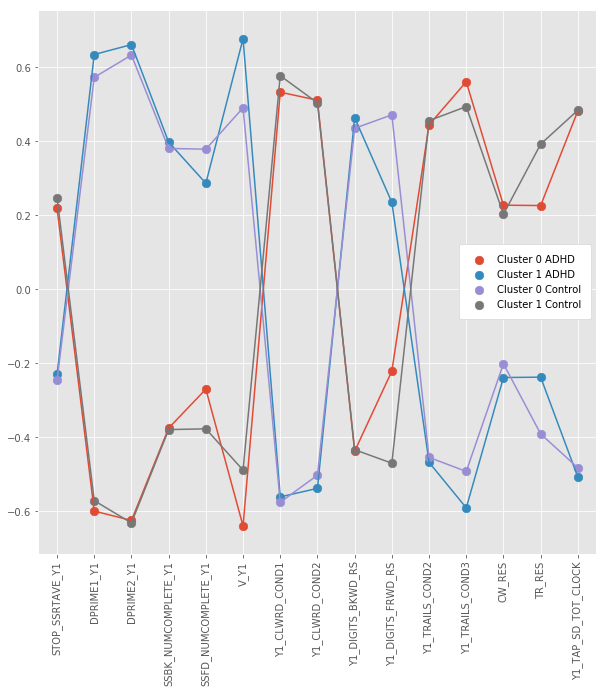

In [162]:
fig, ax = plt.subplots(figsize=(10,10))
cluster_list = [cluster0C, cluster1C, cluster0A, cluster1A]
cluster_labels = ['Cluster 0 ADHD', 'Cluster 1 ADHD', 'Cluster 0 Control', 'Cluster 1 Control']
ind = range(1, len(neuro)+1)

for cluster, name in zip(cluster_list, cluster_labels):
    ax.scatter(ind, np.mean(cluster.loc[:,neuro]), label=name, s=75)
    ax.plot(ind, np.mean(cluster.loc[:,neuro]))
ax.set_xticks(ind)
ax.set_xticklabels(neuro)
ax.set_xlim(0.5, len(neuro)+0.5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.legend(framealpha=True, borderpad=1.0, facecolor="white")

In [ ]:
dprime = ['DPRIME1_Y1', 'DPRIME2_Y1']
spatial_span = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1']


# Bringing It Back Together

Is there any connection between the clusters seen in TMCQ scores, and clusters seen in neuropsych data? How about with DX or DXSUB?

In [164]:
from clustering_functions import *

In [203]:
data = pd.read_csv('data/full_data.csv')
small_data = data.sample(n=200)
TMCQ_all, TMCQ_adhd, TMCQ_control = prep_data(small_data, dataset='TMCQ')
neuro_all, neuro_adhd, neuro_control = prep_data(small_data, dataset='neuro')

In [204]:
impute_transform = ImputeTransform(strategy=MatrixFactorization())
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, n_jobs=-1)

steps = [('impute_transform', impute_transform),
         ('standard_scaler', scaler),
         ('kmeans', kmeans)]

pipeline_neuro_control = Pipeline(steps)
pipeline_neuro_ADHD = Pipeline(steps)

y_neuro_control = pipeline_neuro_control.fit_predict(neuro_control)
y_neuro_ADHD = pipeline_neuro_ADHD.fit_predict(neuro_adhd)

neuro_control['neuro_cluster'] = y_neuro_control
neuro_adhd['neuro_cluster'] = y_neuro_ADHD

Train on 751 samples, validate on 84 samples
Epoch 1/10000
 - 0s - loss: 1.0897 - val_loss: 1.0026
Epoch 2/10000
 - 0s - loss: 1.0867 - val_loss: 1.0041
Epoch 3/10000
 - 0s - loss: 1.0846 - val_loss: 1.0056
Epoch 4/10000
 - 0s - loss: 1.0826 - val_loss: 1.0070
Epoch 5/10000
 - 0s - loss: 1.0806 - val_loss: 1.0084
Epoch 6/10000
 - 0s - loss: 1.0785 - val_loss: 1.0098
Train on 1575 samples, validate on 175 samples
Epoch 1/10000
 - 0s - loss: 1.0825 - val_loss: 1.3176
Epoch 2/10000
 - 0s - loss: 1.0792 - val_loss: 1.3167
Epoch 3/10000
 - 0s - loss: 1.0768 - val_loss: 1.3158
Epoch 4/10000
 - 0s - loss: 1.0746 - val_loss: 1.3150
Epoch 5/10000
 - 0s - loss: 1.0724 - val_loss: 1.3141
Epoch 6/10000
 - 0s - loss: 1.0701 - val_loss: 1.3133
Epoch 7/10000
 - 0s - loss: 1.0679 - val_loss: 1.3124
Epoch 8/10000
 - 0s - loss: 1.0655 - val_loss: 1.3116
Epoch 9/10000
 - 0s - loss: 1.0632 - val_loss: 1.3108
Epoch 10/10000
 - 0s - loss: 1.0607 - val_loss: 1.3099
Epoch 11/10000
 - 0s - loss: 1.0583 - val_l

Epoch 142/10000
 - 0s - loss: 0.7599 - val_loss: 1.2253
Epoch 143/10000
 - 0s - loss: 0.7577 - val_loss: 1.2246
Epoch 144/10000
 - 0s - loss: 0.7555 - val_loss: 1.2240
Epoch 145/10000
 - 0s - loss: 0.7533 - val_loss: 1.2233
Epoch 146/10000
 - 0s - loss: 0.7511 - val_loss: 1.2227
Epoch 147/10000
 - 0s - loss: 0.7489 - val_loss: 1.2221
Epoch 148/10000
 - 0s - loss: 0.7467 - val_loss: 1.2214
Epoch 149/10000
 - 0s - loss: 0.7445 - val_loss: 1.2208
Epoch 150/10000
 - 0s - loss: 0.7423 - val_loss: 1.2202
Epoch 151/10000
 - 0s - loss: 0.7401 - val_loss: 1.2196
Epoch 152/10000
 - 0s - loss: 0.7379 - val_loss: 1.2190
Epoch 153/10000
 - 0s - loss: 0.7357 - val_loss: 1.2183
Epoch 154/10000
 - 0s - loss: 0.7335 - val_loss: 1.2177
Epoch 155/10000
 - 0s - loss: 0.7313 - val_loss: 1.2171
Epoch 156/10000
 - 0s - loss: 0.7291 - val_loss: 1.2166
Epoch 157/10000
 - 0s - loss: 0.7269 - val_loss: 1.2160
Epoch 158/10000
 - 0s - loss: 0.7247 - val_loss: 1.2154
Epoch 159/10000
 - 0s - loss: 0.7226 - val_loss:

In [205]:
neuro_all.loc[neuro_control.index,'neuro_cluster'] = neuro_control.loc[:,'neuro_cluster'].map({0:'0C', 1:'1C'})
neuro_all.loc[neuro_adhd.index,'neuro_cluster'] = neuro_adhd.loc[:,'neuro_cluster'].map({0:'0A', 1:'1A'})

In [206]:
kmeans_tmcq = KMeans(n_clusters=2, n_jobs=-1)

y_tmcq_control = kmeans_tmcq.fit_predict(TMCQ_control)
y_tmcq_adhd = kmeans_tmcq.fit_predict(TMCQ_adhd)

TMCQ_control['tmcq_cluster'] = y_tmcq_control
TMCQ_adhd['tmcq_cluster'] = y_tmcq_adhd

TMCQ_all.loc[TMCQ_control.index,'tmcq_cluster'] = TMCQ_control.loc[:,'tmcq_cluster'].map({0:'0C', 1:'1C'})
TMCQ_all.loc[TMCQ_adhd.index,'tmcq_cluster'] = TMCQ_adhd.loc[:,'tmcq_cluster'].map({0:'0A', 1:'1A'})

In [207]:
small_data.loc[TMCQ_all.index,'tmcq_cluster'] = TMCQ_all.loc[:,'tmcq_cluster']
small_data.loc[neuro_all.index,'neuro_cluster'] = neuro_all.loc[:,'neuro_cluster']

In [188]:
small_data

,Unnamed: 0,STOP_SSRTAVE_Y1,DPRIME1_Y1,DPRIME2_Y1,SSBK_NUMCOMPLETE_Y1,SSFD_NUMCOMPLETE_Y1,V_Y1,Y1_CLWRD_COND1,Y1_CLWRD_COND2,Y1_DIGITS_BKWD_RS,...,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,Y1_P_TMCQ_SURGENCY,Y1_P_TMCQ_EFFCONT,Y1_P_TMCQ_NEGAFFECT,DX,DXSUB,tmcq_cluster,neuro_cluster
330,330,426.700000,0.964035,1.534536,9.0,13.0,3.4288,48.0,29.0,6.0,...,3.111111,3.000000,4.666667,4.035690,3.167460,2.600476,3.0,5.0,0A,1A
189,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000,1.500000,4.222222,4.422896,4.015000,1.825714,1.0,1.0,0C,NaN
466,466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,2.400000,4.222222,3.572391,3.030000,2.366190,3.0,3.0,1A,NaN
129,129,169.945000,0.482597,2.157887,7.0,7.0,2.7042,43.0,28.0,6.0,...,3.400000,1.900000,4.333333,3.676768,3.527619,2.090635,1.0,1.0,0C,0C
18,18,NaN,1.095334,2.635487,7.0,7.0,NaN,47.0,36.0,4.0,...,4.250000,4.166667,NaN,3.266667,3.539744,3.704762,3.0,3.0,NaN,NaN
370,370,338.110000,0.233391,1.819914,7.0,7.0,1.7166,55.0,39.0,6.0,...,4.200000,3.400000,4.555556,3.656566,3.150714,3.391032,3.0,5.0,0A,0A
653,653,491.876000,1.106534,2.171547,5.0,9.0,2.8570,38.0,33.0,10.0,...,3.900000,2.700000,4.222222,3.693603,3.397857,2.595238,3.0,5.0,1A,1A
776,776,280.023333,2.159189,3.294230,13.0,15.0,4.4034,35.0,28.0,11.0,...,3.200000,2.500000,3.666667,3.516498,3.143333,2.058175,1.0,1.0,1C,1C
430,430,367.887500,0.911901,1.750561,7.0,7.0,2.0110,52.0,43.0,4.0,...,3.300000,3.100000,4.111111,3.583165,3.298333,2.803889,3.0,5.0,1A,0A
227,227,137.780000,0.258258,0.611628,5.0,7.0,3.3212,64.0,41.0,6.0,...,2.800000,2.600000,3.666667,4.305724,2.236667,2.450159,3.0,5.0,0A,0A


In [215]:
small_data[small_data['neuro_cluster'] == '0C']['tmcq_cluster'].value_counts()

0C    19
1C     5
Name: tmcq_cluster, dtype: int64